<a href="https://colab.research.google.com/github/chornamarta/ml3.0/blob/main/Module%202/Linear%20Regression/HW_2_1_6_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


# Знайомство з даними

### **Завдання 1.**

Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
df = pd.read_csv('cars.csv')

In [3]:
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


### **Завдання 2.**

Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# df.dtypes
# df.Owner_Type.unique()
# df.Transmission.unique()
# df.Fuel_Type.unique()
# df.Model.unique()
# df.Brand.unique()

**Висновок**

В цьому датасеті 13 колонок -  8 чисельних та 5 категоріальних

З них - 2 бінарні, 2 мультикатегоріальні, 1 категоріальна з порядком

Категоріальні колонки:
*   `Brand` - категоріальна
*   `Model`- категоріальна
*   `Fuel_type` - бінарна
*   `Transmission`- бінарна
*   `OwnerType` - порядково-категоріальна



### **Завдання 3**.

Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [57]:
X = df.drop('Price', axis=1)
y = df['Price']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [59]:
len(X_train), len(X_test)

(80, 20)

### **Завдання 4**.

Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

#### 1

In [61]:
X_train.Fuel_Type.value_counts()

,count
Fuel_Type,
Petrol,41
Diesel,39


In [62]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
X_train['fuel_codes'] = X_train.Fuel_Type.map(fuel_codes)
X_test['fuel_codes'] = X_test.Fuel_Type.map(fuel_codes)

In [63]:
X_train.Transmission.value_counts()

,count
Transmission,
Automatic,49
Manual,31


In [64]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['transmission_codes'] = X_train.Transmission.map(transmission_codes)
X_test['transmission_codes'] = X_test.Transmission.map(transmission_codes)

#### 2

In [65]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [66]:
one_hot = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot

In [67]:
one_hot2 = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot2

#### 3

In [70]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [71]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

#### 4*

In [72]:
X_train.groupby('Brand')['Model'].unique()

,Model
Brand,
Audi,"[A5, A6, Q7, A3]"
BMW,"[X3, X5, 7 Series, 3 Series, 5 Series]"
Ford,"[Mustang, Ranger, Endeavour, EcoSport, Aspire]"
Honda,"[WR-V, BR-V, Civic]"
Hyundai,"[Santro, Venue, Elantra, Sonata, Verna]"
Mahindra,"[XUV300, Thar, Scorpio]"
Maruti,"[S-Cross, Vitara, Swift]"
Mercedes,"[GLC, C-Class, GLE, E-Class, GLA]"
Tata,"[Altroz, Tiago, Tigor, Safari, Harrier, Nexon]"


In [73]:
X_y_train = X_train.copy()
X_y_train['Price'] = y_train

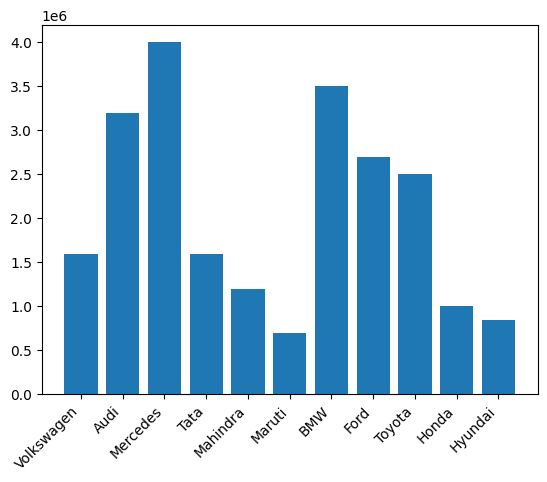

In [74]:
plt.bar(X_y_train.Brand,X_y_train.Price)
plt.xticks(rotation=45, ha='right')
plt.show()

In [75]:
mean_prices_brand = X_y_train.groupby('Brand')['Price'].mean().sort_values()

In [76]:
mean_prices_brand

,Price
Brand,
Maruti,6.800000e+05
Hyundai,7.250000e+05
Tata,7.450000e+05
Honda,8.400000e+05
Mahindra,8.750000e+05
Volkswagen,1.150000e+06
Toyota,1.606250e+06
Ford,1.666667e+06
Audi,2.700000e+06


In [77]:
num_price_bins = 4
price_group_labels = ['Low_Price_Model', 'Medium_Price_Model', 'High_Price_Model', 'Premium_Price_Model']
model_price_groups = pd.qcut(
        mean_prices_brand,
        q=num_price_bins,
        labels=price_group_labels,
        duplicates='drop'
    )

In [78]:
model_to_price_list = model_price_groups.to_dict()

In [79]:
X_train['Model_Price_Group'] = X_train['Brand'].map(model_to_price_list)
X_train.Model_Price_Group.value_counts()

,count
Model_Price_Group,
Premium_Price_Model,26
Low_Price_Model,21
High_Price_Model,17
Medium_Price_Model,16


In [80]:
X_test['Model_Price_Group'] = X_test['Brand'].map(model_to_price_list)
X_test.Model_Price_Group.value_counts()

,count
Model_Price_Group,
Low_Price_Model,7
Medium_Price_Model,5
Premium_Price_Model,4
High_Price_Model,4


In [81]:
ordenc_model = OrdinalEncoder(categories=[price_group_labels]) # визначаємо порядок категорій
ordenc_model.fit(X_train[['Model_Price_Group']])

X_train['Model_Price_Codes'] = ordenc_model.transform(X_train[['Model_Price_Group']])
X_test['Model_Price_Codes'] = ordenc_model.transform(X_test[['Model_Price_Group']])

In [82]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Group,Model_Price_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium_Price_Model,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium_Price_Model,3.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Premium_Price_Model,3.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium_Price_Model,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Premium_Price_Model,3.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Group,Model_Price_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Premium_Price_Model,3.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Low_Price_Model,0.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Medium_Price_Model,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Low_Price_Model,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,High_Price_Model,2.0


(None, None)

### **Завдання 5.**

Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [83]:
X_y_train = X_train.select_dtypes('number')
X_y_train['Price'] = y_train

In [84]:
X_y_train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Codes,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0,2500000


In [85]:
co_mtx = X_y_train.corr()
co_mtx

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.060669,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.285032,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.045152,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.573044,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.564938,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.651018,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,0.031190,0.000979
fuel_codes,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,-0.075683,-0.110782
transmission_codes,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.509043,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.392309,0.328858


In [86]:
strong_corr = co_mtx['Price'][abs(co_mtx['Price']) > 0.5]
strong_corr

,Price
Mileage,-0.638404
Engine,0.710561
Power,0.849137
transmission_codes,0.680731
Model_Price_Codes,0.845739
Price,1.000000


**Кореляція**

Найкраща корелція колонки `Price` є з:
- `Mileage` -0.64
- `transmission_code`0.68
- `Engine` 0.71
- `Power` & `Model_Price_Code` 0.85

### **Завдання 6**.
Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

#### 0

In [87]:
X_train = X_train.select_dtypes('number')
X_test = X_test.select_dtypes('number')

In [88]:
display(X_train.head(),X_test.head())

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Codes
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3.0


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Codes
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0


#### 1

In [89]:
model = LinearRegression().fit(X_train, y_train)

#### 2

In [90]:
predictions = model.predict(X_test)
loss = root_mean_squared_error(y_test,predictions)
print('Test Loss:', loss)

Test Loss: 258181.56112032756


In [91]:
predictions_train = model.predict(X_train)
loss = root_mean_squared_error(y_train,predictions_train)
print('Training Loss:', loss)

Training Loss: 210293.5782815187


#### 3

Text(0, 0.5, 'Predicted values')

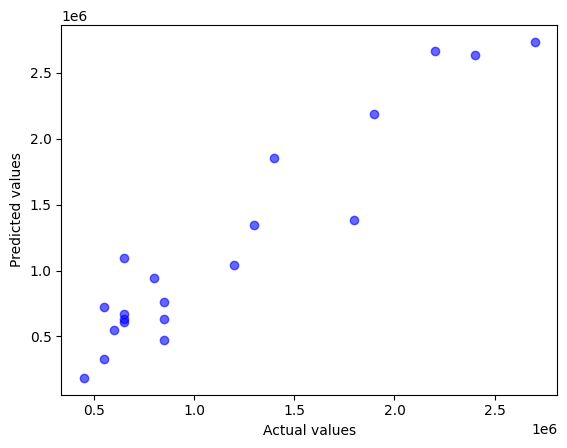

In [92]:
plt.scatter(y_test, predictions, alpha=0.6, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

Text(0, 0.5, 'Predicted values')

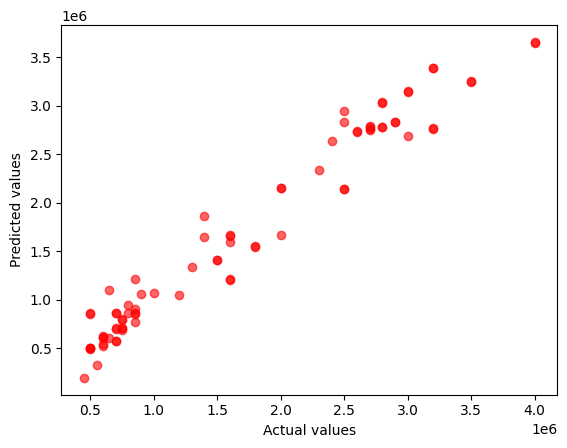

In [93]:
plt.scatter(y_train, predictions_train, alpha=0.6, color='red')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

**Висновки**

- Модель виглядає такою, яка добре навчається, оскільки точки досить непогано формують уявну лінію
- Проте вже на даних для тестування, напочатку ще модель тримається лінії далі йде розсіювання, що не є доброю моделю

### **Завдання 7**.
Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

#### 1

In [94]:
scaler = StandardScaler()

In [95]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### 2

In [51]:
X_train.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_codes,transmission_codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Model_Price_Codes
0,0.274862,0.795395,-0.628491,-0.504398,-0.231967,84.0,2019.0,22000.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,-0.018324,0.795395,0.087196,1.176928,0.247012,56.0,2018.0,28000.0,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.604696,0.795395,0.111560,1.176928,0.910213,27.0,2018.0,28000.0,5.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.274862,-1.257237,-0.476217,-0.504398,-0.784634,55.0,2017.0,32000.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,-1.484254,0.795395,0.122219,1.176928,0.910213,20.0,2017.0,26000.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [96]:
model_2 = LinearRegression().fit(X_train_scaled, y_train)

In [97]:
coefficients = model_2.coef_

In [103]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns,1),
    'weight': np.append(model_2.coef_, model_2.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
22,1,1.680000e+06
5,Power,4.967692e+05
21,Model_Price_Codes,1.966547e+05
16,Mercedes,1.363478e+05
9,Audi,1.356266e+05
10,BMW,1.347063e+05
8,transmission_codes,1.166938e+05
20,Owner_Type_Codes,4.234495e+04
17,Tata,2.088878e+04
0,Car_ID,5.608685e+03


Колонки з найбліьшими коефіцієнтами:
- `Power`: значення коеф. додатнє, означає що чим потужніше авто, тим воно дорожче
- `Fuel_codes` показує, що на ціну авта, значно впливає яке саме пальне в нього
- `Model_Price_Code` теж високий коефіцієнт, бо логічно чим краща модель тим дорожча
- `Ford` ось тут коефіцієнт відʼємний, що може означити, що машини цієї марки дешевші ніж інші

Також там далі ідуть майже одна з одною три колонки `Mercedes`, `Audi`, `BMW`, які по суті мають ту саму роль що і `Ford`, але в протилежну сторону - машини цих брендів коштують більше середнього




### **Завдання 8.**
На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [113]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns,index=X_train.index)

In [116]:
X_sm = sm.add_constant(X_train_scaled_df)
model_sm = sm.OLS(y_train,X_sm)
results = model_sm.fit()
results.params

,0
const,1.680000e+06
Car_ID,5.608685e+03
Year,-8.765646e+03
Kilometers_Driven,-9.439872e+04
Mileage,-1.317155e+05
Engine,-2.137745e+04
Power,4.967692e+05
Seats,-2.148925e+03
fuel_codes,-1.838480e+05
transmission_codes,1.166938e+05


In [117]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     68.35
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           2.01e-33
Time:                        18:33:48   Log-Likelihood:                -1094.0
No. Observations:                  80   AIC:                             2230.
Df Residuals:                      59   BIC:                             2280.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

**Ознаки які є стат.зачущими**

* `Mileage`
*   `Power`
*   `fuel_codes`
*   `transmission_codes`
*   `Audi`
*   `BMW`
*   `Ford`
*   `Hyundai`
*   `Mahindra`
* `Mercedes`
* `Volkswagen`
* `Model_Price_Codes`
* `const`



### **Завдання 9**.
Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [120]:
X_sm_2 = sm.add_constant(X_train_scaled_df[['Audi','BMW','Ford','Hyundai','Mahindra',
                                           'Mercedes','Volkswagen','Model_Price_Codes',
                                           'transmission_codes','fuel_codes','Power',
                                           'Mileage']])
model_sm_2 = sm.OLS(y_train,X_sm_2)
results2 = model_sm_2.fit()
results2.params

,0
const,1.680000e+06
Audi,1.846685e+05
BMW,2.234746e+05
Ford,-7.882574e+04
Hyundai,-6.543519e+04
Mahindra,-8.207379e+04
Mercedes,2.092059e+05
Volkswagen,-1.528605e+04
Model_Price_Codes,1.572201e+05
transmission_codes,1.133379e+05


In [121]:
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           1.35e-39
Time:                        20:56:15   Log-Likelihood:                -1099.1
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      67   BIC:                             2255.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.74

**Висновки**

1. При скорочені кількості ознак, `Volkswagen` вже не є стат.значущою
2. R2 в повній моделі 0.959, тут 0.953; Adj. R-squared в повній моделі і новій є 0.945 - тобто зменшення ознак не повпливало на якість опису цільової змінної


### **Завдання 10**.
Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [122]:
X_sm_3 = sm.add_constant(X_train_scaled_df[['Audi','BMW','Ford','Hyundai','Mahindra',
                                           'Mercedes','Volkswagen','Model_Price_Codes',
                                           'transmission_codes','fuel_codes','Power',
                                           'Mileage','Kilometers_Driven','Honda','Maruti']])
model_sm_3 = sm.OLS(y_train,X_sm_3)
results3 = model_sm_3.fit()
results3.params

,0
const,1.680000e+06
Audi,1.509568e+05
BMW,1.629307e+05
Ford,-1.139975e+05
Hyundai,-7.455624e+04
Mahindra,-1.124612e+05
Mercedes,1.584630e+05
Volkswagen,-4.928789e+04
Model_Price_Codes,1.744609e+05
transmission_codes,1.175415e+05


In [123]:
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           4.85e-38
Time:                        21:12:34   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.65

**Висновки**

Модель і показники не сильно змінились. Швидше за все використовувалм б модель з 9го завдання.

> Але додатково нижче спробувала забрати ще стат. не значущі змінні і певно ця модель найкраща - бо найменша кількість ознак, і гарні значення у R2, Adj.R2, F-statistic





In [125]:
X_sm_4 = sm.add_constant(X_train_scaled_df[['Audi','BMW','Ford','Mahindra',
                                           'Mercedes','Model_Price_Codes',
                                           'transmission_codes','fuel_codes','Power',
                                           'Mileage']])
model_sm_4 = sm.OLS(y_train,X_sm_4)
results4 = model_sm_4.fit()
print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     131.6
Date:                Sun, 15 Jun 2025   Prob (F-statistic):           7.27e-41
Time:                        21:15:59   Log-Likelihood:                -1101.4
No. Observations:                  80   AIC:                             2225.
Df Residuals:                      69   BIC:                             2251.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                1.68e+06   2.78